In [166]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()

## Load the data

In [11]:
month_list = [
    'april', 'august', 'december', 'february', 'january','july','june',
    'march','may','november','october','september'
]

In [27]:
path = r'C:\Users\matte\OneDrive\Desktop\GitHub\data\sales analy\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data'
dfs = {}

for month in month_list:
    path2 = path + f'\\Sales_{month.capitalize()}_2019.csv'
    dfs[month] = pd.read_csv(path2)

In [28]:
df = pd.concat([dfs[x] for x in dfs.keys()])
df.reset_index(drop=True, inplace=True)
df.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"
186849,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016"


## Data cleaning 

In [29]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

### Parse to datetime

In [ ]:
from datetime import datetime

df.rename(columns={'Order Date':'Order Date2'}, inplace=True)

In [45]:
mask = (df['Order Date2'].str.len() == 10)
df.loc[mask][-7:]

,Order ID,Product,Quantity Ordered,Price Each,Order Date2,Purchase Address
184779,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185118,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186738,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [47]:
df.drop(df[mask].index, inplace=True)
df['Order Date2'].str.len().value_counts()

Order Date2
14.0    185950
Name: count, dtype: int64

In [52]:
df['Order Date'] = df['Order Date2'].str.split(' ').str.get(0)
df['Order Time'] = df['Order Date2'].str.split(' ').str.get(1)
df.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date2,Purchase Address,Order Date,Order Time
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09/17/19,20:56
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09/01/19,16:00
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09/23/19,07:39
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09/19/19,17:30
186849,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016",09/30/19,00:18


In [53]:
df.drop(columns='Order Date2', inplace=True)

df['Order Date'] = pd.to_datetime(df['Order Date'], format=r'%m/%d/%y')
df['Order Time'] = pd.to_datetime(df['Order Time'], format=r'%H:%M')
df.tail()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Order Date,Order Time
186845,259353,AAA Batteries (4-pack),3,2.99,"840 Highland St, Los Angeles, CA 90001",2019-09-17,1900-01-01 20:56:00
186846,259354,iPhone,1,700,"216 Dogwood St, San Francisco, CA 94016",2019-09-01,1900-01-01 16:00:00
186847,259355,iPhone,1,700,"220 12th St, San Francisco, CA 94016",2019-09-23,1900-01-01 07:39:00
186848,259356,34in Ultrawide Monitor,1,379.99,"511 Forest St, San Francisco, CA 94016",2019-09-19,1900-01-01 17:30:00
186849,259357,USB-C Charging Cable,1,11.95,"250 Meadow St, San Francisco, CA 94016",2019-09-30,1900-01-01 00:18:00


In [144]:
df['Order Time'] = df['Order Time'].dt.time

In [57]:
df.tail(2)

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Order Date,Order Time
186848,259356,34in Ultrawide Monitor,1,379.99,"511 Forest St, San Francisco, CA 94016",2019-09-19,17:30:00
186849,259357,USB-C Charging Cable,1,11.95,"250 Meadow St, San Francisco, CA 94016",2019-09-30,00:18:00


In [62]:
df['Quantity Ordered'] = df['Quantity Ordered'].astype('Int16')
df['Price Each'] = df['Price Each'].astype('float32')

### Changing the dtypes

In [84]:
mask = df.isnull().any(axis='columns')
df[mask].notnull().any(axis='columns').value_counts()

False    545
Name: count, dtype: int64

In [87]:
df.drop(df[mask].index, inplace=True)

In [88]:
df.isnull().any(axis='columns').value_counts()

False    185950
Name: count, dtype: int64

### Add a city column


In [97]:
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Order Date,Order Time,Revenue
0,176558,USB-C Charging Cable,2,11.950000,"917 1st St, Dallas, TX 75001",2019-04-19,08:46:00,23.9
2,176559,Bose SoundSport Headphones,1,99.989998,"682 Chestnut St, Boston, MA 02215",2019-04-07,22:30:00,99.989998


In [128]:
pattern= r',\s?([\w\s]+)'

df['City'] = df['Purchase Address'].str.findall(pattern).str.get(0)
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Order Date,Order Time,Revenue,City,State
0,176558,USB-C Charging Cable,2,11.950000,"917 1st St, Dallas, TX 75001",2019-04-19,08:46:00,23.9,Dallas,TX
2,176559,Bose SoundSport Headphones,1,99.989998,"682 Chestnut St, Boston, MA 02215",2019-04-07,22:30:00,99.989998,Boston,MA


In [114]:
pattern= r',\s?([\w]+)'

df['State'] = df['Purchase Address'].str.findall(pattern).str.get(1)
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Order Date,Order Time,Revenue,City,State
0,176558,USB-C Charging Cable,2,11.950000,"917 1st St, Dallas, TX 75001",2019-04-19,08:46:00,23.9,Dallas,TX
2,176559,Bose SoundSport Headphones,1,99.989998,"682 Chestnut St, Boston, MA 02215",2019-04-07,22:30:00,99.989998,Boston,MA


## Revenue by month

In [89]:
df['Revenue'] = df['Quantity Ordered'].multiply(df['Price Each'])

In [95]:
mask = df['Order Date'].dt.month

sales_x_month = df.groupby(mask)['Revenue'].sum().to_frame()
sales_x_month.sort_values(ascending=False, by='Revenue')

,Revenue
Order Date,
12,4613443.5
10,3736726.75
4,3390670.25
11,3199603.25
5,3152606.75
3,2807100.25
7,2647775.75
6,2577802.25
8,2244467.75


<Axes: xlabel='Order Date'>

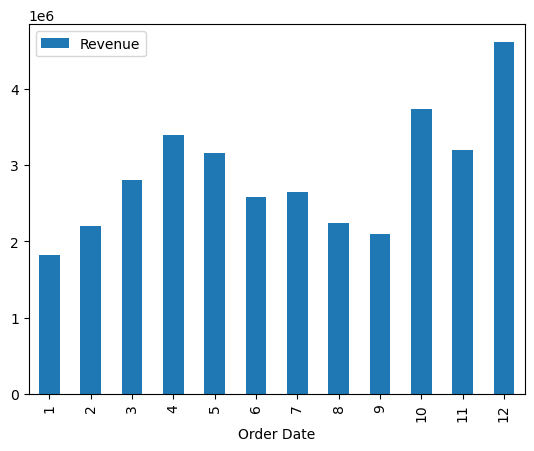

In [96]:
sales_x_month.plot.bar()

## Revenue by city

In [131]:
mask = df['City'] + ' (' + df['State'] + ')'

revenue_x_city = df.groupby(mask)['Revenue'].sum().to_frame()
revenue_x_city

,Revenue
Atlanta (GA),2795498.5
Austin (TX),1819581.75
Boston (MA),3661642.0
Dallas (TX),2767975.5
Los Angeles (CA),5452571.0
New York City (NY),4664317.5
Portland (ME),449758.28125
Portland (OR),1870732.375
San Francisco (CA),8262204.0
Seattle (WA),2747755.5


<Axes: >

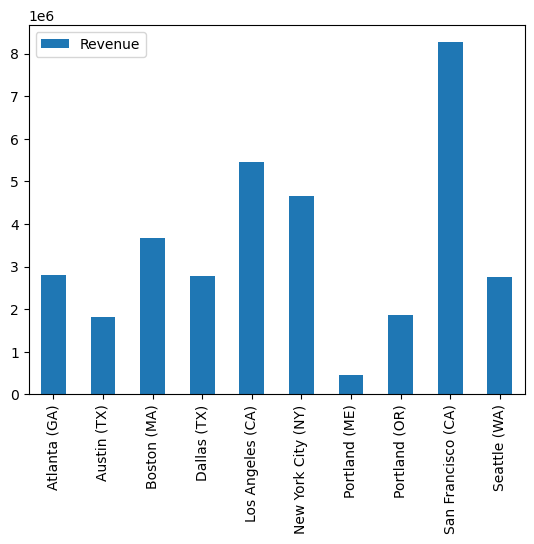

In [132]:
revenue_x_city.plot.bar()

## Revenue by hour

In [145]:
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Order Date,Order Time,Revenue,City,State
0,176558,USB-C Charging Cable,2,11.950000,"917 1st St, Dallas, TX 75001",2019-04-19,08:46:00,23.9,Dallas,TX
2,176559,Bose SoundSport Headphones,1,99.989998,"682 Chestnut St, Boston, MA 02215",2019-04-07,22:30:00,99.989998,Boston,MA


In [164]:
mask = df['Order Time'].apply(lambda x: x.hour)
revenue_x_hour = df.groupby(mask)['Revenue'].sum().to_frame()
revenue_x_hour

,Revenue
Order Time,
0,713721.25
1,460866.875
2,234851.4375
3,145757.890625
4,162661.015625
5,230679.8125
6,448113.0
7,744854.125
8,1192349.0


<Axes: xlabel='Order Time'>

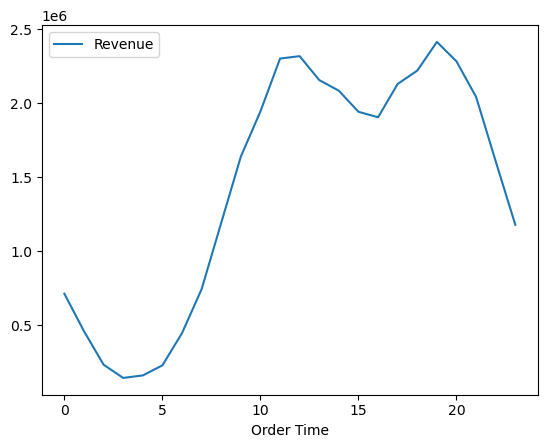

In [165]:
revenue_x_hour.plot()

In [174]:
month_mask = df['Order Date'].dt.month

revenue_month_hour = df.groupby([month_mask, mask])['Revenue'].sum().to_frame()
revenue_month_hour.head(2)

Revenue
Order Date Order Time              
1          0           42715.960938
           1           24645.650391

c:\Users\matte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\matte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\matte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\matte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_con

<Axes: xlabel='Order Time', ylabel='Revenue'>

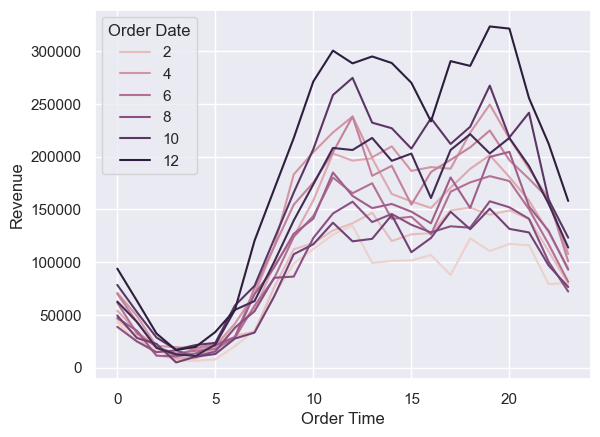

In [172]:
sns.lineplot(data=revenue_month_hour.reset_index(),
             x='Order Time', y='Revenue', hue='Order Date')

## What products are most often sold togheter

In [265]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Order Date,Order Time,Revenue,City,State
0,176558,USB-C Charging Cable+,2,11.950000,"917 1st St, Dallas, TX 75001",2019-04-19,08:46:00,23.9,Dallas,TX
2,176559,Bose SoundSport Headphones+,1,99.989998,"682 Chestnut St, Boston, MA 02215",2019-04-07,22:30:00,99.989998,Boston,MA
3,176560,Google Phone+,1,600.000000,"669 Spruce St, Los Angeles, CA 90001",2019-04-12,14:38:00,600.0,Los Angeles,CA
4,176560,Wired Headphones+,1,11.990000,"669 Spruce St, Los Angeles, CA 90001",2019-04-12,14:38:00,11.99,Los Angeles,CA
5,176561,Wired Headphones+,1,11.990000,"333 8th St, Los Angeles, CA 90001",2019-04-30,09:27:00,11.99,Los Angeles,CA


In [266]:
products = df['Product'] + '+'

In [271]:
grouped = products.groupby(df['Order ID']).sum().to_frame().reset_index()
grouped.loc[grouped['Order ID'] == '176560']

,Order ID,Product
35326,176560,Google Phone+Wired Headphones+


In [272]:
mask = grouped['Product'].apply(lambda x: 'Google Phone' in x)
gphone = grouped[mask]
gphone_corr = gphone['Product'].value_counts().to_frame()

In [273]:
gphone_corr = gphone_corr.reset_index()
gphone_corr.head(3)

,Product,count
0,Google Phone+,3886
1,Google Phone+USB-C Charging Cable+,856
2,Google Phone+Wired Headphones+,303


In [274]:
gphone_corr = gphone_corr[gphone_corr['count'] > 20]
gphone_corr.size

14

In [275]:
gphone_corr

,Product,count
0,Google Phone+,3886
1,Google Phone+USB-C Charging Cable+,856
2,Google Phone+Wired Headphones+,303
3,Google Phone+Bose SoundSport Headphones+,161
4,Google Phone+USB-C Charging Cable+Wired Headph...,77
5,Google Phone+USB-C Charging Cable+Bose SoundSp...,31
6,Google Phone+Bose SoundSport Headphones+Wired ...,21


In [276]:
gphone_corr['Product'] = gphone_corr['Product'] + '$'
gphone_corr['Product'].str.replace('Google Phone+', '').str.replace('+$','')

0                                                  $
1                               USB-C Charging Cable
2                                   Wired Headphones
3                         Bose SoundSport Headphones
4              USB-C Charging Cable+Wired Headphones
5    USB-C Charging Cable+Bose SoundSport Headphones
6        Bose SoundSport Headphones+Wired Headphones
Name: Product, dtype: object

In [277]:
gphone_corr['Product'] = gphone_corr['Product'].str.replace('Google Phone+', '').str.replace('+$','')

gphone_corr.drop(0, inplace=True)
gphone_corr

,Product,count
1,USB-C Charging Cable,856
2,Wired Headphones,303
3,Bose SoundSport Headphones,161
4,USB-C Charging Cable+Wired Headphones,77
5,USB-C Charging Cable+Bose SoundSport Headphones,31
6,Bose SoundSport Headphones+Wired Headphones,21


<Axes: >

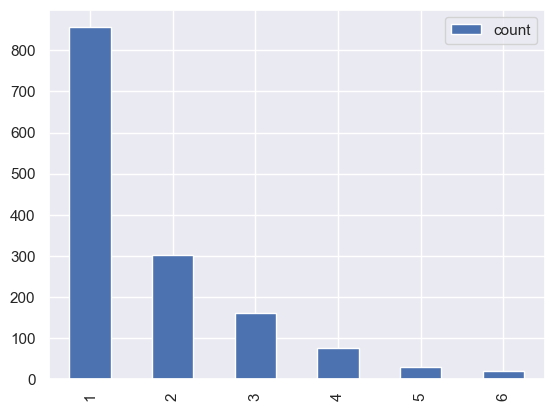

In [278]:
gphone_corr.plot.bar()